## Task 1

In [232]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from matplotlib.pyplot import figure
from sklearn.tree import plot_tree
from sklearn.datasets import load_breast_cancer

from sklearn.model_selection import GridSearchCV, cross_val_score

from sklearn.metrics import (roc_curve, auc, roc_auc_score,confusion_matrix)
import itertools

In [255]:
X = np.random.uniform(-1,1,(1000,2))
Y = np.logical_xor(X[:, 0] >= 0, X[:, 1] >= 0)

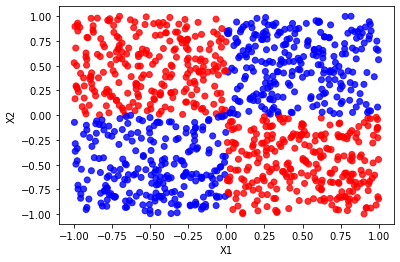

In [256]:
plt.scatter(X[:, 0], X[:, 1], c=Y, alpha=0.8, cmap='bwr')
plt.xlabel('X1'), plt.ylabel('X2');

In [257]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,stratify=Y)

In [258]:
clf = DecisionTreeClassifier(max_depth=4) 
clf.fit(X_train, y_train)      

y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)  

1.0

In [259]:
from sklearn.metrics import accuracy_score

def plot_decision_surface(
                  clf, X, y,
                  nx=200, ny=100,
                  cmap='bwr',
                  alpha=0.6,
        ):
    """
    Plot the decision boundary of clf on X and y, visualize training points
    """
    
    # Define the grid
    x_top_left = X.min(axis=0) - 1
    x_bottom_right = X.max(axis=0) + 1
    grid_x0, grid_x1 = np.meshgrid(
         np.linspace(x_top_left[0], x_bottom_right[0], ny),
         np.linspace(x_top_left[1], x_bottom_right[1], nx)
      )
    
    # Calculate predictions on the grid
    y_pred_grid = clf.predict(
                        np.stack(
                              [
                                grid_x0.ravel(),
                                grid_x1.ravel()
                              ],
                              axis=1
                            )
                      ).reshape(grid_x1.shape)
    
    # Find optimal contour levels and make a filled
    # contour plot of predictions
    labels = np.sort(np.unique(y))
    labels = np.concatenate([[labels[0] - 1],
                             labels,
                             [labels[-1] + 1]])
    medians = (labels[1:] + labels[:-1]) / 2
    plt.contourf(grid_x0, grid_x1, y_pred_grid, cmap=cmap, alpha=alpha,
                 levels=medians)
    
    # Scatter data points on top of the plot,
    # with different styles for correct and wrong
    # predictions
    y_pred = clf.predict(X)
    plt.scatter(*X[y_pred==y].T, c=y[y_pred==y],
                marker='o', cmap=cmap, s=10, label='correct')
    plt.scatter(*X[y_pred!=y].T, c=y[y_pred!=y],
                marker='x', cmap=cmap, s=50, label='errors')

    # Dummy plot call to print the accuracy in the legend.
    plt.plot([], [], ' ',
             label='Accuracy = {:.3f}'.format(accuracy_score(y, y_pred)))
    
    plt.legend(loc='best')

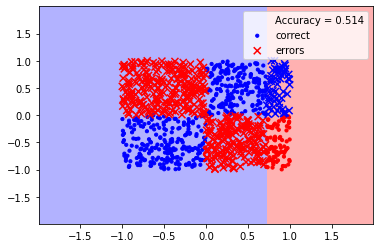

In [260]:
clf = DecisionTreeClassifier(max_depth=1)
clf.fit(X, Y)
plot_decision_surface(clf, X,Y)

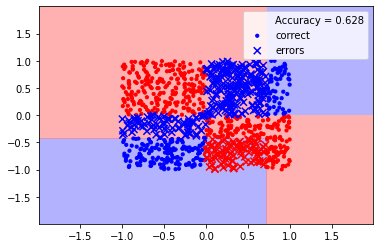

In [261]:
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(X, Y)
plot_decision_surface(clf, X,Y)

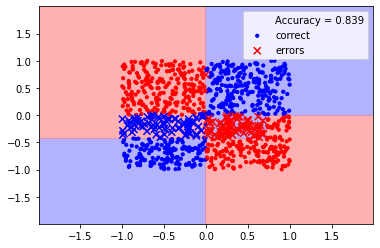

In [262]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X, Y)
plot_decision_surface(clf, X,Y)

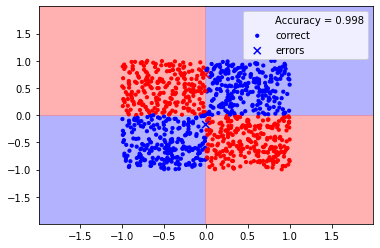

In [263]:
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X, Y)
plot_decision_surface(clf, X,Y)

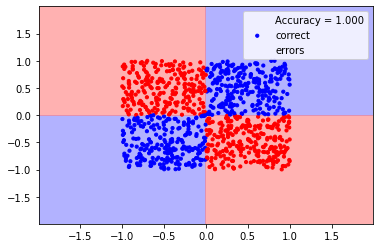

In [264]:
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X, Y)
plot_decision_surface(clf, X,Y)

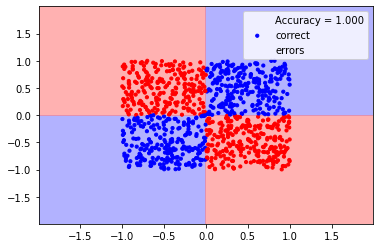

In [265]:
clf = DecisionTreeClassifier(max_depth=6)
clf.fit(X, Y)
plot_decision_surface(clf, X,Y)

[Text(675.3571428571429, 332.2, 'X[0] <= 0.718\ngini = 0.5\nsamples = 1000\nvalue = [486, 514]'),
 Text(420.7142857142857, 271.79999999999995, 'X[1] <= -0.413\ngini = 0.5\nsamples = 858\nvalue = [429, 429]'),
 Text(177.14285714285714, 211.39999999999998, 'X[0] <= 0.0\ngini = 0.475\nsamples = 255\nvalue = [156, 99]'),
 Text(88.57142857142857, 150.99999999999997, 'gini = 0.0\nsamples = 156\nvalue = [156, 0]'),
 Text(265.7142857142857, 150.99999999999997, 'gini = 0.0\nsamples = 99\nvalue = [0, 99]'),
 Text(664.2857142857142, 211.39999999999998, 'X[0] <= -0.004\ngini = 0.496\nsamples = 603\nvalue = [273, 330]'),
 Text(442.85714285714283, 150.99999999999997, 'X[1] <= 0.0\ngini = 0.365\nsamples = 325\nvalue = [78, 247]'),
 Text(354.2857142857143, 90.59999999999997, 'gini = 0.0\nsamples = 78\nvalue = [78, 0]'),
 Text(531.4285714285714, 90.59999999999997, 'gini = 0.0\nsamples = 247\nvalue = [0, 247]'),
 Text(885.7142857142857, 150.99999999999997, 'X[1] <= -0.003\ngini = 0.419\nsamples = 278\nv

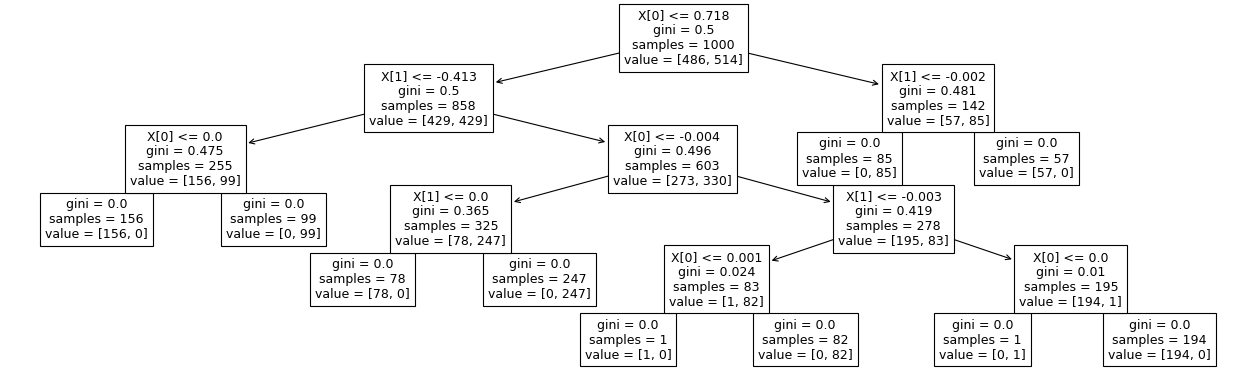

In [266]:
figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
plot_tree(clf.fit(X, Y))

## Task 2

In [267]:
data = load_breast_cancer()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target_names[data.target]

#y[y == 'benign'] = 1
#y[y == 'malignant'] = 0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12345)

print(X_train.iloc[:5])
print(y_train[:5])



     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
375       16.170         16.07          106.30      788.5          0.09880   
416        9.405         21.70           59.60      271.2          0.10440   
530       11.750         17.56           75.89      422.9          0.10730   
363       16.500         18.29          106.60      838.1          0.09686   
435       13.980         19.62           91.12      599.5          0.10600   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
375           0.14380         0.06651              0.05397         0.1990   
416           0.06159         0.02047              0.01257         0.2025   
530           0.09713         0.05282              0.04440         0.1598   
363           0.08468         0.05862              0.04835         0.1495   
435           0.11330         0.11260              0.06463         0.1669   

     mean fractal dimension  ...  worst radius  worst texture  \
375

In [268]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9370629370629371

In [269]:
param_grid = {'criterion':['gini','entropy'], 'max_depth' :range(1,20,1), 'splitter':['best','random']}
grid_search = GridSearchCV(clf,param_grid=param_grid,cv=5)
grid_search.fit(X_train, y_train)
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=15, splitter='random')

In [270]:
def show_cm(y_true, y_pred, class_names=None, model_name=None):
    cf = confusion_matrix(y_true, y_pred)
    plt.imshow(cf, cmap=plt.cm.Blues)
    
    if model_name:
        plt.title("Confusion Matrix: {}".format(model_name))
    else:
        plt.title("Confusion Matrix")
        plt.ylabel("True Label")
        plt.xlabel("Predicted Label")
    if class_names:
        tick_marks = np.arange(len(class_names))
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
    else:
        class_names = set(y_true)
        tick_marks = np.arange(len(class_names))
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
    
    thresh = cf.max() / 2.0
    
    for i, j in itertools.product(range(cf.shape[0]),
                                  range(cf.shape[1])):
        plt.text(j, i, cf[i, j],
            horizontalalignment="center",
            color="white" if cf[i, j] > thresh else "black",
            )
        
    plt.colorbar()

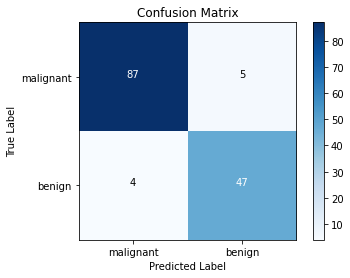

In [271]:
show_cm(y_test, y_pred)

In [272]:
def get_auc_scores(clf, X_train, X_test, y_train, y_test):
    
    y_train_score = clf.predict_proba(X_train)[:, 1]
    y_test_score = clf.predict_proba(X_test)[:, 1]
    auc_train = roc_auc_score(y_train, y_train_score)
    auc_test = roc_auc_score(y_test, y_test_score)
    print(f"""Training AUC: {auc_train} Testing AUC: {auc_test}""")
    return y_test_score

In [273]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=15)
clf.fit(X_train, y_train)
get_auc_scores(clf,X_train, X_test, y_train, y_test)

Training AUC: 1.0 Testing AUC: 0.8868286445012787


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1.,
       1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1.,
       0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1.])

In [274]:
def plot_roc_curve(y_test, y_test_score):
    
    fpr, tpr, _ = roc_curve(y_test, y_test_score)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % roc_auc)
    plt.plot([0, 1], [0, 1], "k — ")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic")
    plt.legend(loc="lower right")
    plt.show()